In [1]:
from train_model import train_autoencoder

import torch
import torchvision
from torchvision.transforms import Compose, ToTensor, Normalize, ToPILImage

import numpy as np

In [2]:
n_latent_features = 40
image_shape = (3, 32, 32)
batch_size = 64

In [3]:
transform = Compose([ToTensor()])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
model_20 = train_autoencoder(
    n_latent_features=20, train_criterion=torch.nn.BCELoss(), 
    train_loader=train_loader, n_epochs=5, image_shape=image_shape, 
    use_gpu=True
)

epoch #0 mean train loss: 0.602
epoch #1 mean train loss: 0.589
epoch #2 mean train loss: 0.588
epoch #3 mean train loss: 0.588
epoch #4 mean train loss: 0.587


In [5]:
model_100 = train_autoencoder(
    n_latent_features=100, train_criterion=torch.nn.BCELoss(), 
    train_loader=train_loader, n_epochs=5, image_shape=image_shape, 
    use_gpu=True
)

epoch #0 mean train loss: 0.595
epoch #1 mean train loss: 0.577
epoch #2 mean train loss: 0.573
epoch #3 mean train loss: 0.570
epoch #4 mean train loss: 0.569


In [6]:
import matplotlib.pyplot as plt

In [7]:
num_images = 20
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=num_images, shuffle=True)

test_images = None
test_labels = None

for x, y in test_loader:
    test_images = x
    test_labels = y
    
    break

In [8]:
def plot_reconstructed_images_over_actual(models, images, labels):
    
    classes = np.array(('plane', 'car', 'bird', 'cat',
                    'deer', 'dog', 'frog', 'horse', 'ship', 'truck'))
    
    x = images.cuda()
    
    xs_numpy = []
    rec_xs_numpy = []
    
    for _, model in models:
        rec_x = model(x)
        x_numpy = x.cpu().detach().numpy()
        rec_x_numpy = rec_x.cpu().detach().numpy()
        
        xs_numpy.append(x_numpy)
        rec_xs_numpy.append(rec_x_numpy)
    
    nrows, ncols = len(images), 1 + len(models)
    fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))

    for i, (x, y) in enumerate(zip(x, labels)):
        ax[i][0].imshow(np.moveaxis(x_numpy[i], (0, 1, 2), (2, 0, 1)))
        ax[i][0].set_title(f'actual {classes[y]}')
        
        for model_number, (model_name, model) in enumerate(models):
            ax[i][1+model_number].imshow(np.moveaxis(rec_xs_numpy[model_number][i], (0, 1, 2), (2, 0, 1)))
            ax[i][1+model_number].set_title(f'{model_name} output')

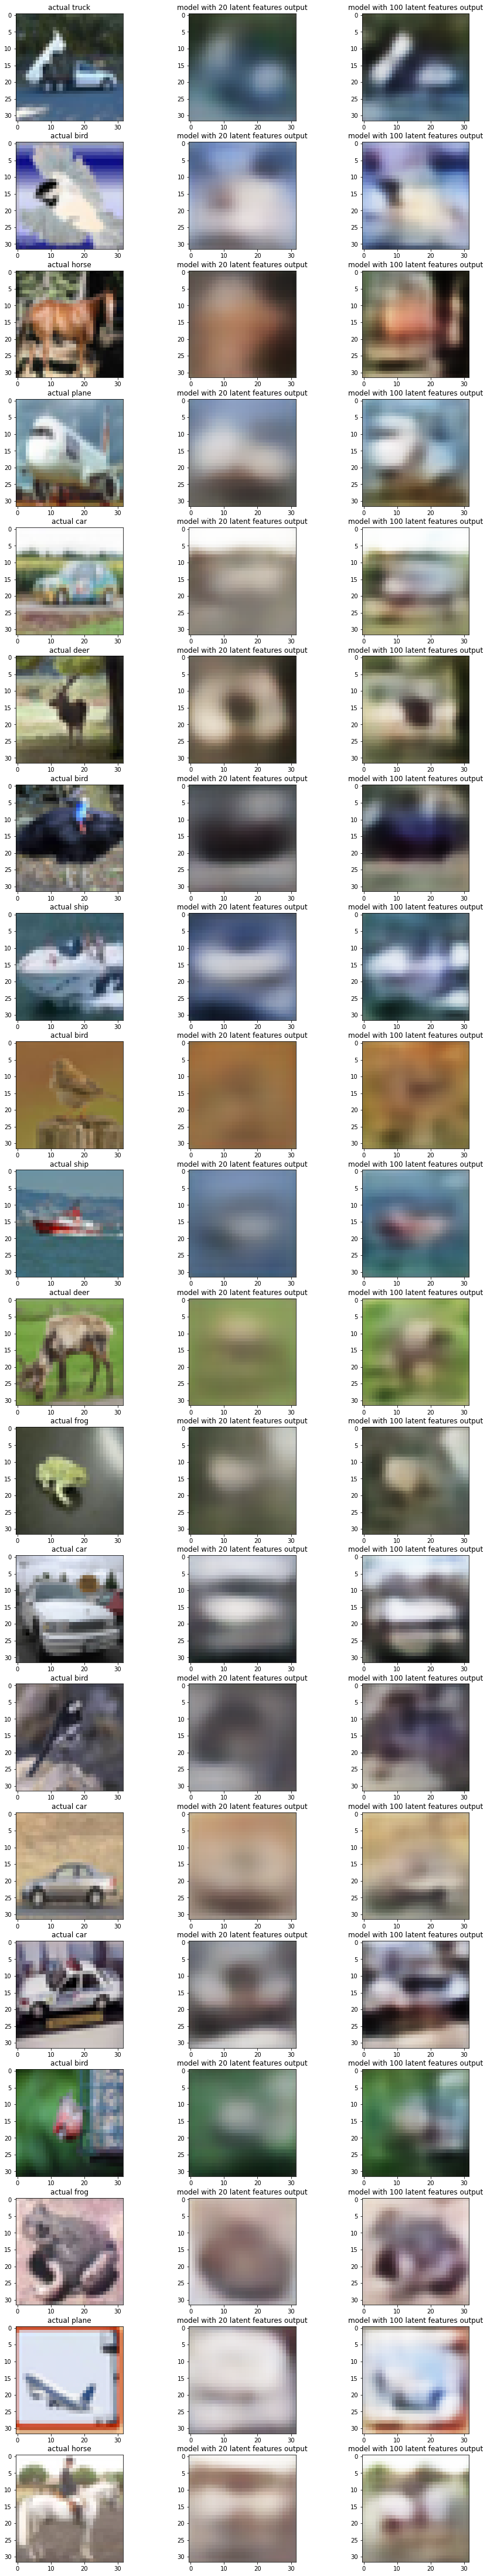

In [9]:
models = [('model with 20 latent features', model_20), ('model with 100 latent features', model_100)]

for _, model in models:
    model.eval()

plot_reconstructed_images_over_actual(models, test_images, test_labels)